<a href="https://colab.research.google.com/github/Vedang21/projc115/blob/main/pc115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data_to_load=files.upload()

Saving ve.csv to ve (1).csv


In [ ]:
import pandas as pd
import plotly.express as px
df=pd.read_csv("ve.csv")
Velocity=df["Velocity"].tolist()
Escaped=df["Escaped"].tolist()
fig=px.scatter(x=Velocity,y=Escaped)
fig.show()

In [ ]:
import numpy as np
Velocity_array=np.array(Velocity)
Escaped_array=np.array(Escaped)
m,c=np.polyfit(Velocity_array,Escaped_array,1)

y=[]
for x in Velocity_array:
  y_value=m*x+c
  y.append(y_value)
fig=px.scatter(x=Velocity_array,y=Escaped_array)
fig.update_layout(shapes=[
    dict(
        type='line',
         y0=min(y),y1=max(y),
         x0=min(Velocity_array),x1=max(Velocity_array)
    )
])
fig.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



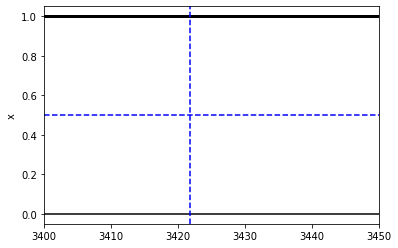

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X=np.reshape(Velocity,(len(Velocity),1))
Y=np.reshape(Escaped,(len(Velocity),1))

lr=LogisticRegression()
lr.fit(X,Y)
plt.figure()
plt.scatter(X.ravel(),Y,color='red',zorder=10)
def model(x):
  return 1/(1+np.exp(-x))

X_test=np.linspace(0,5000,10000)
escaping_chances=model(X_test*lr.coef_+lr.intercept_).ravel()
plt.plot(X_test,escaping_chances,color='black',linewidth=3)
plt.axhline(y=0,color='k',linestyle='-')
plt.axhline(y=1,color='k',linestyle='-')
plt.axhline(y=0.5,color='b',linestyle='--')
plt.axvline(x=X_test[6843],color='b',linestyle='--')
plt.ylabel('y')
plt.ylabel('x')
plt.xlim(3400,3450)
plt.show()

In [11]:
t=float(input("enter the velocity:-"))
c=model(t*lr.coef_+lr.intercept_).ravel()[0]
if c<=0.01:
  print("velocity will not escape")
elif c>=1:
  print("velocity escaped")
elif c<0.5:
  print("velocity might not escape")
else:
  print("velocity might escape")

enter the velocity:-123456789098765432123456789
velocity escaped
